# Hand written digit classifier using Convolutional Neural Network
**In the first code, we will start with a CNN with randomly set hyperparameters.**
**Thereafter we will tune these hyper parameters.**

**Ignoring warning & logs from some packages**

In [0]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

**Loading all required packages**

In [0]:
import tensorflow as tf
print(tf.__version__)
tf.get_logger().setLevel('ERROR')

import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

**Splitting the data into train & test**

In [5]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = np.array(x_train)
print(x_train.shape)

x_test = np.array(x_test)
print(x_test.shape)

y_train = np.array(y_train)
print(y_train.shape)

y_test = np.array(y_test)
print(y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#example:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Start with a CNN, having 4 CNN maps, each followed by BatchNormalization. We also used 2 MaxPool2D layers & 2 Dropout layers. Then we used 3 layers of dense network.**

In [0]:
model = Sequential()

model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu',input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 20, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 20, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


#What the pooling operation does is it reduces the size of the image and focuses in on the strongest values. 
#This effectively allows the machine learner to help identify the most important pixels and regions in the image

In [8]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=["accuracy"])


# Import model checkpoint from keras callbacks
from keras.callbacks import ModelCheckpoint

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
save_best_only=True)


model.fit(x_train, y_train,
validation_split=0.2, epochs=10, verbose=2, batch_size=64, 
callbacks = [model_save])


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 14s - loss: 0.2765 - acc: 0.9123 - val_loss: 0.0685 - val_acc: 0.9788
Epoch 2/10
 - 7s - loss: 0.0977 - acc: 0.9706 - val_loss: 0.0468 - val_acc: 0.9864
Epoch 3/10
 - 7s - loss: 0.0773 - acc: 0.9773 - val_loss: 0.0408 - val_acc: 0.9888
Epoch 4/10
 - 7s - loss: 0.0651 - acc: 0.9804 - val_loss: 0.0398 - val_acc: 0.9895
Epoch 5/10
 - 7s - loss: 0.0627 - acc: 0.9815 - val_loss: 0.0453 - val_acc: 0.9888
Epoch 6/10
 - 7s - loss: 0.0570 - acc: 0.9833 - val_loss: 0.0475 - val_acc: 0.9877
Epoch 7/10
 - 7s - loss: 0.0524 - acc: 0.9847 - val_loss: 0.0354 - val_acc: 0.9910
Epoch 8/10
 - 7s - loss: 0.0508 - acc: 0.9854 - val_loss: 0.0317 - val_acc: 0.9919
Epoch 9/10
 - 7s - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0326 - val_acc: 0.9918
Epoch 10/10
 - 7s - loss: 0.0442 - acc: 0.9871 - val_loss: 0.0465 - val_acc: 0.9891


**val_acc: 0.99 after 10 epochs**

**Tuning the activation function**

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


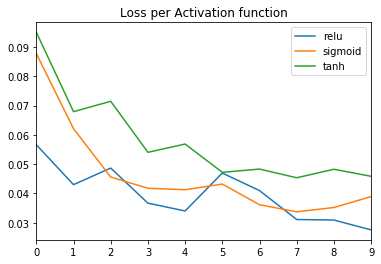

In [26]:
# Comparing the models trained with multiple activation functions
# Set a random seed
np.random.seed(1)

# Return a new model with the given activation
def get_model(act_function):
    
    model = Sequential()

    model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation=act_function,input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation=act_function))
    model.add(BatchNormalization())
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 20, kernel_size = (3, 3), activation=act_function))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 20, kernel_size = (3, 3), activation=act_function))
    model.add(BatchNormalization())
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(500, activation=act_function))
    model.add(Dropout(0.25))
    model.add(Dense(1000, activation=act_function))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
  
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

    return model

# Activation functions to try out
activations = ['relu', 'sigmoid', 'tanh']

# Dictionary to store results
activation_results = {}

for funct in activations:
    model = get_model(act_function=funct)
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, verbose=4, batch_size = 64)
    activation_results[funct] = history


import pandas as pd
# Extract val_loss history of each activation function
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}
# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_funct)
# Plot the curves
val_loss_curves.plot(title='Loss per Activation function')

**Relu turned out to be the best activation function.**

**In the next part of the code, we will be tuning several hyperparameters at the same time. So, we will be training several models. To speed up the computation, we are taking a smaller subsample from our train data. If we had more computation power on our system, we would have run the tuning code for entire training data**

In [9]:
x_train1 = x_train[0:500,:,:,:]
y_train1 = y_train[0:500,:]

print(x_train.shape)
print(x_train1.shape)

print(y_train.shape)
print(y_train1.shape)


(60000, 28, 28, 1)
(500, 28, 28, 1)
(60000, 10)
(500, 10)


**Tuning the no.of CNN maps, no. of filters in each CNN map, k size & no.of nodes in dense layer**

In [0]:
def create_model(cl=1, fl=16, ks = 3, dn = 500):
    
    #Starting the model building by adding input layer
    model = Sequential()
    model.add(Conv2D(filters = fl, kernel_size = (ks, ks), activation='relu',input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    

    # Add as many additional hidden layers with f1 filters each as specified in cl
    for i in range(cl-1):
        # Layers have nn neurons
        model.add(Conv2D(filters = fl, kernel_size = (ks, ks), activation='relu'))
        model.add(BatchNormalization())
    
    
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(0.25))

        
    # Add as many hidden layers with 2*f1 filters as specified in cl
    for i in range(cl):
        # Layers have nn neurons
        model.add(Conv2D(filters = 2*fl, kernel_size = (ks, ks), activation='relu'))
        model.add(BatchNormalization())
    
    
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    #dn specifies the no of neurons in dense layers
    model.add(Dense(dn, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2*dn, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

    return model
    

# Define parameters, named just like in create_model()
params = dict(cl=[2], fl=[12,16], ks = [2,3], dn = [250,500])

# Import sklearn wrapper from keras
from keras.wrappers.scikit_learn import KerasClassifier
# Import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 10, batch_size = 64)

random_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=4)

random_search_result = random_search.fit(x_train1, y_train1)
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


**Best model has accuracy = 0.92 using best hyper parameters as {'cl': 2, 'dn': 500, 'fl': 16, 'ks': 3}**

**Printing the classification report**

In [30]:
from sklearn.metrics import classification_report
#the KerasClassifier comes back with the labels 0-9, so we use argmax
#to turn our one-hot encoding into 0-9 digit labels
y_true, y_pred = np.argmax(y_test, axis=1), random_search.predict(x_test)
print()
print(classification_report(y_true, y_pred))
print()



              precision    recall  f1-score   support

           0       0.93      0.96      0.95       980
           1       0.98      0.99      0.98      1135
           2       0.88      0.93      0.90      1032
           3       0.96      0.83      0.89      1010
           4       0.95      0.91      0.93       982
           5       0.87      0.90      0.89       892
           6       0.89      0.96      0.92       958
           7       0.92      0.85      0.88      1028
           8       0.93      0.85      0.89       974
           9       0.80      0.90      0.85      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000




**Tuning remaining hyperparameters: batch_size, epochs, dropout**

In [0]:

def dense_model(dropout):
    model = Sequential()

    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(2*dropout))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model


# define the grid search parameters
batch_size = [32,64]
epochs = [10, 20]
dropout = [0.1, 0.25]
hyperparameters = dict(batch_size=batch_size, epochs=epochs, dropout = dropout)


model = KerasClassifier(build_fn=dense_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5, verbose=4)
grid_result = grid.fit(x_train1, y_train1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


**Best model have accuracy 0.926 & following parameters {'batch_size': 64, 'dropout': 0.25, 'epochs': 20}**

In [13]:
from sklearn.metrics import classification_report
y_true, y_pred = np.argmax(y_test, axis=1), grid.predict(x_test)
print()
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       980
           1       0.96      0.99      0.98      1135
           2       0.83      0.94      0.89      1032
           3       0.96      0.87      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.93      0.87      0.90       892
           6       0.94      0.93      0.94       958
           7       0.91      0.87      0.89      1028
           8       0.95      0.87      0.91       974
           9       0.79      0.91      0.84      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [0]:
#Checking model accuracy on untouched test data
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))